<a href="https://colab.research.google.com/github/raffiilham/PVCK_Ganjil_2024/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Accesing my google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

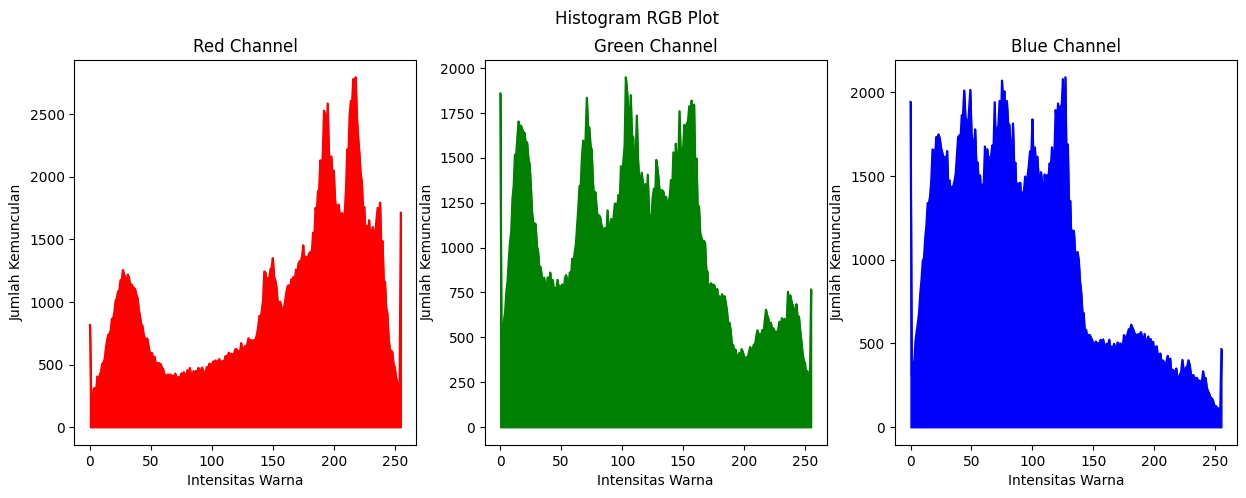

In [9]:
img = cv.imread('/content/drive/MyDrive/PCVK/images/lena.jpg')
if img is None:
  print('Image not loaded. Check file path and permissions.')
else:
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

  # Membuat plot untuk setiap channel warna
  plt.figure(figsize=(15, 5)) # Removed extra indent

  # Membuat histogram untuk channel Red
  plt.subplot(1, 3, 1)
  hist_red = cv.calcHist([img], [2], None, [256], [0, 256])  # Channel 2 adalah Red
  plt.plot(hist_red, color='r')
  plt.fill_between(range(256), hist_red[:, 0], color='r')
  plt.title("Red Channel")
  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah Kemunculan")

  # Membuat histogram untuk channel Green
  plt.subplot(1, 3, 2)
  hist_green = cv.calcHist([img], [1], None, [256], [0, 256])  # Channel 1 adalah Green
  plt.plot(hist_green, color='g')
  plt.fill_between(range(256), hist_green[:, 0], color='g')
  plt.title("Green Channel")
  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah Kemunculan")

  # Membuat histogram untuk channel Blue
  plt.subplot(1, 3, 3)
  hist_blue = cv.calcHist([img], [0], None, [256], [0, 256])  # Channel 0 adalah Blue
  plt.plot(hist_blue, color='b')
  plt.fill_between(range(256), hist_blue[:, 0], color='b')
  plt.title("Blue Channel")
  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah Kemunculan")

  # Menampilkan histogram RGB secara terpisah
  plt.suptitle("Histogram RGB Plot")
  plt.show()

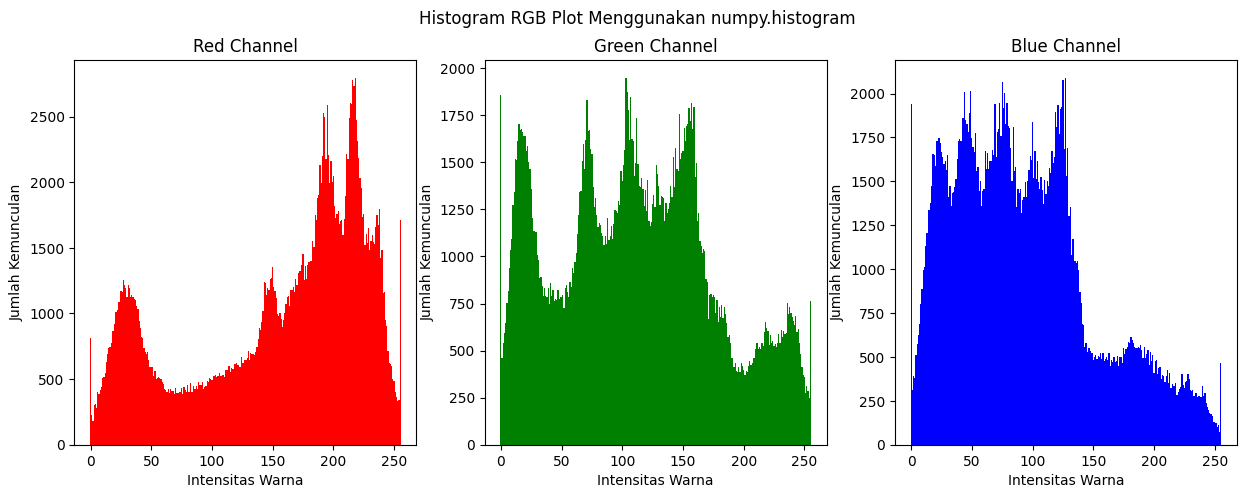

In [11]:
img = cv.imread('/content/drive/MyDrive/PCVK/images/lena.jpg')
if img is None:
  print('Image not loaded. Check file path and permissions.')
else:
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

  # Memisahkan channel warna (Red, Green, Blue)
  red_channel = img_rgb[:, :, 0].ravel()  # Channel Red
  green_channel = img_rgb[:, :, 1].ravel()  # Channel Green
  blue_channel = img_rgb[:, :, 2].ravel()  # Channel Blue

  # Menghitung histogram untuk setiap channel warna menggunakan numpy.histogram
  hist_red, bins_red = np.histogram(red_channel, bins=256, range=[0, 256])
  hist_green, bins_green = np.histogram(green_channel, bins=256, range=[0, 256])
  hist_blue, bins_blue = np.histogram(blue_channel, bins=256, range=[0, 256])

  # Membuat plot untuk setiap channel warna
  plt.figure(figsize=(15, 5))

  # Membuat histogram untuk channel Red
  plt.subplot(1, 3, 1)
  plt.bar(bins_red[:-1], hist_red, color='r', width=1.0)
  plt.title("Red Channel")
  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah Kemunculan")

  # Membuat histogram untuk channel Green
  plt.subplot(1, 3, 2)
  plt.bar(bins_green[:-1], hist_green, color='g', width=1.0)
  plt.title("Green Channel")
  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah Kemunculan")

  # Membuat histogram untuk channel Blue
  plt.subplot(1, 3, 3)
  plt.bar(bins_blue[:-1], hist_blue, color='b', width=1.0)
  plt.title("Blue Channel")
  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah Kemunculan")

  # Menampilkan histogram RGB secara terpisah
  plt.suptitle("Histogram RGB Plot Menggunakan numpy.histogram")
  plt.show()

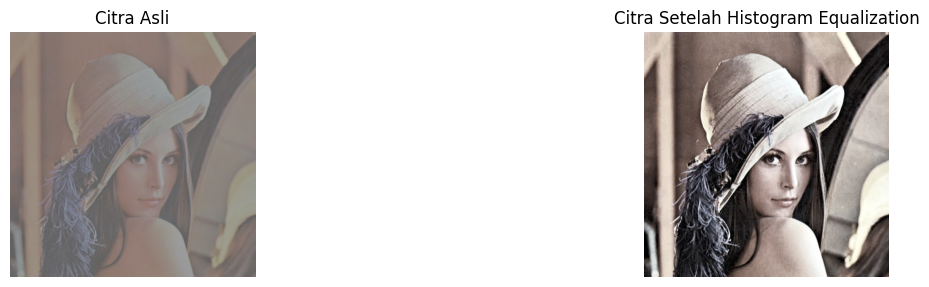

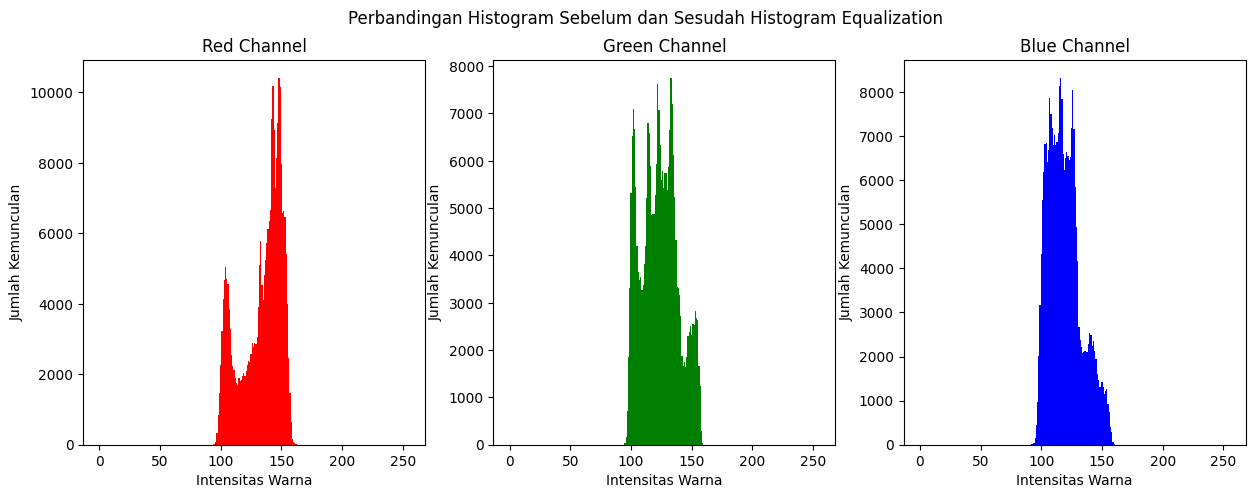

In [20]:
img = cv.imread('/content/drive/MyDrive/PCVK/images/lena_lc.jpg')

# Memeriksa apakah citra berhasil dibaca
if img is None:
    print("Gagal membaca citra. Pastikan path gambar benar.")
else:
    # Mengubah citra dari BGR (OpenCV default) menjadi YCrCb
    img_ycrcb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)

    # Melakukan histogram equalization pada channel Y (luminance)
    y_channel, cr_channel, cb_channel = cv.split(img_ycrcb)
    y_channel_eq = cv.equalizeHist(y_channel)

    # Menggabungkan kembali channel Y yang telah diequalisasi dengan channel Cr dan Cb asli
    image_ycrcb_eq = cv.merge([y_channel_eq, cr_channel, cb_channel])

    # Mengubah kembali dari YCrCb ke BGR untuk menampilkan gambar hasil equalization
    img_eq = cv.cvtColor(image_ycrcb_eq, cv.COLOR_YCrCb2BGR) # Changed img_ycrcb_eq to image_ycrcb_eq

    # Menampilkan gambar sebelum dan sesudah equalization
    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title("Citra Asli")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(cv.cvtColor(img_eq, cv.COLOR_BGR2RGB))
    plt.title("Citra Setelah Histogram Equalization")
    plt.axis("off")

    # Convert the image from BGR to RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Memisahkan channel warna (Red, Green, Blue)
    red_channel = img_rgb[:, :, 0].ravel()  # Channel Red
    green_channel = img_rgb[:, :, 1].ravel()  # Channel Green
    blue_channel = img_rgb[:, :, 2].ravel()  # Channel Blue

    # Menghitung histogram untuk setiap channel warna menggunakan numpy.histogram
    hist_red, bins_red = np.histogram(red_channel, bins=256, range=[0, 256])
    hist_green, bins_green = np.histogram(green_channel, bins=256, range=[0, 256])
    hist_blue, bins_blue = np.histogram(blue_channel, bins=256, range=[0, 256])

    # Membuat plot untuk setiap channel warna
    plt.figure(figsize=(15, 5))

    # Membuat histogram untuk channel Red
    plt.subplot(1, 3, 1)
    plt.bar(bins_red[:-1], hist_red, color='r', width=1.0)
    plt.title("Red Channel")
    plt.xlabel("Intensitas Warna")
    plt.ylabel("Jumlah Kemunculan")

    # Membuat histogram untuk channel Green
    plt.subplot(1, 3, 2)
    plt.bar(bins_green[:-1], hist_green, color='g', width=1.0)
    plt.title("Green Channel")
    plt.xlabel("Intensitas Warna")
    plt.ylabel("Jumlah Kemunculan")

    # Membuat histogram untuk channel Blue
    plt.subplot(1, 3, 3)
    plt.bar(bins_blue[:-1], hist_blue, color='b', width=1.0)
    plt.title("Blue Channel")
    plt.xlabel("Intensitas Warna")
    plt.ylabel("Jumlah Kemunculan")

    # Menampilkan hasil plot
    plt.suptitle("Perbandingan Histogram Sebelum dan Sesudah Histogram Equalization")
    plt.show()